# Import Libraries Required

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , StandardScaler , LabelEncoder 


In [2]:
df = pd.read_csv(r"C:\DATA SCIENCE\GITHUB REPO\Data\train.csv")

In [3]:
df2 = pd.read_csv(r"C:\DATA SCIENCE\GITHUB REPO\Data\test.csv")

In [4]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [5]:
df2.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,NaN,0.0289,0.625,122.019,202960.000000,4
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,NaN,0.1620,0.222,74.028,4.093117,4


In [6]:
df.shape

(17996, 17)

In [7]:
df2.shape

(7713, 16)

In [8]:
data = pd.concat([df, df2], axis=0, ignore_index=True)


In [9]:
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5.0
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10.0
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6.0
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5.0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10.0


In [10]:
data.shape

(25709, 17)

In [11]:
data.sample(5)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
17028,Shlomo Artzi,◊ê◊ó◊®◊ô ◊î◊õ◊ú ◊ê◊™ ◊©◊ô◊®,28.0,0.536,0.335,8.0,-12.395,0,0.0308,0.858000,0.023200,0.309,0.331,133.343,304400.0,4,10.0
24189,Midtown,Give It Up,32.0,0.457,0.922,10.0,-2.766,0,0.0689,0.000357,NaN,0.103,0.587,159.816,221800.0,4,NaN
22761,Slum Village,We Do It (Jazz Spastiks Remix),45.0,0.782,0.713,7.0,-7.801,1,0.3300,0.358000,NaN,0.155,0.901,92.063,187942.0,4,NaN
10263,Corrosion Of Conformity,Stare Too Long,45.0,0.529,0.827,5.0,-7.619,1,0.0369,0.004340,0.000227,0.134,0.678,79.033,296813.0,4,8.0
17171,THE DRIVER ERA,Preacher Man,55.0,0.689,0.947,1.0,-3.926,1,0.0897,0.002090,NaN,0.228,0.393,119.993,219390.0,4,9.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25709 entries, 0 to 25708
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         25709 non-null  object 
 1   Track Name          25709 non-null  object 
 2   Popularity          25054 non-null  float64
 3   danceability        25709 non-null  float64
 4   energy              25709 non-null  float64
 5   key                 22887 non-null  float64
 6   loudness            25709 non-null  float64
 7   mode                25709 non-null  int64  
 8   speechiness         25709 non-null  float64
 9   acousticness        25709 non-null  float64
 10  instrumentalness    19423 non-null  float64
 11  liveness            25709 non-null  float64
 12  valence             25709 non-null  float64
 13  tempo               25709 non-null  float64
 14  duration_in min/ms  25709 non-null  float64
 15  time_signature      25709 non-null  int64  
 16  Clas

In [13]:
data.isnull().sum()

Artist Name              0
Track Name               0
Popularity             655
danceability             0
energy                   0
key                   2822
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      6286
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                 7713
dtype: int64

In [14]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,25054.000000,25709.000000,25709.000000,22887.000000,25709.000000,25709.00000,25709.000000,25709.000000,19423.000000,25709.000000,25709.000000,25709.000000,2.570900e+04,25709.000000,17996.000000
mean,44.648360,0.544836,0.662983,5.944073,-7.889735,0.63962,0.079810,0.245377,0.175318,0.196818,0.487282,122.729307,2.003485e+05,3.922245,6.695821
std,17.420299,0.165872,0.235204,3.209502,4.029280,0.48012,0.083771,0.309852,0.302269,0.159871,0.239539,29.617081,1.123260e+05,0.364073,3.206073
min,1.000000,0.000000,0.000020,1.000000,-39.952000,0.00000,0.000000,0.000000,0.000001,0.011900,0.000000,0.000000,5.016500e-01,0.000000,0.000000
25%,33.000000,0.434000,0.509000,3.000000,-9.532000,0.00000,0.034800,0.004370,0.000089,0.097700,0.300000,99.633000,1.660920e+05,4.000000,5.000000
50%,44.000000,0.546000,0.700000,6.000000,-6.988000,1.00000,0.047300,0.079800,0.003950,0.130000,0.482000,120.259000,2.090710e+05,4.000000,8.000000
75%,56.000000,0.660000,0.861000,9.000000,-5.188000,1.00000,0.083100,0.425000,0.188000,0.258000,0.672000,141.978000,2.521330e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.00000,0.960000,0.996000,0.996000,1.000000,0.986000,249.438000,1.561133e+06,5.000000,10.000000


# Checking for outliers

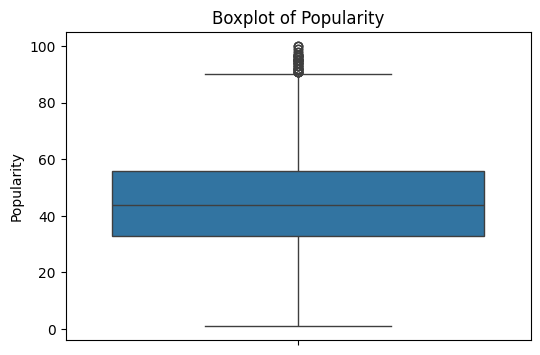

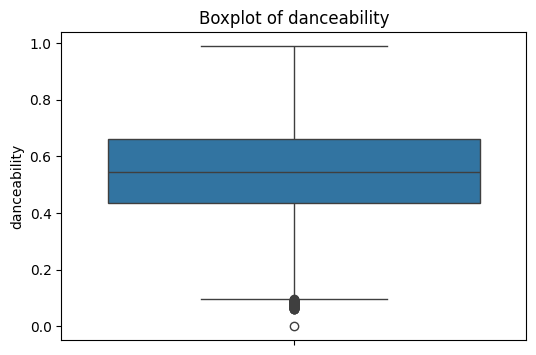

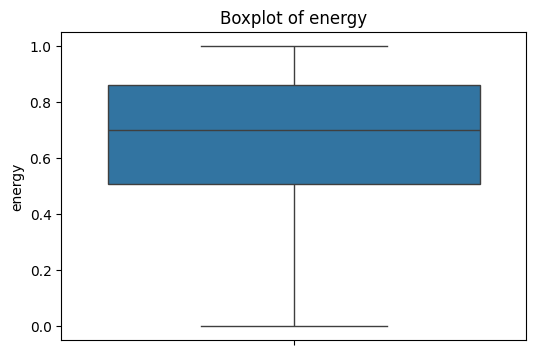

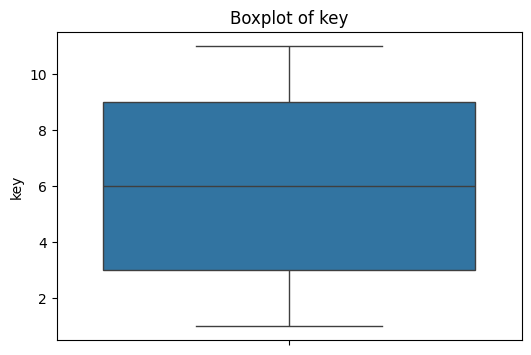

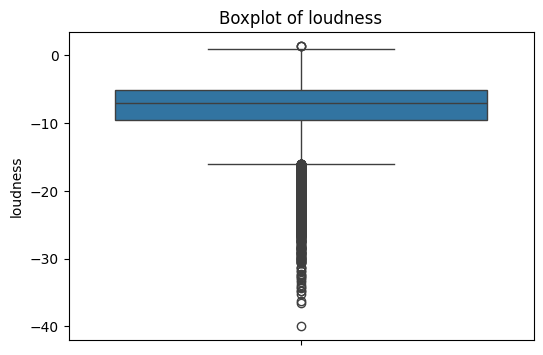

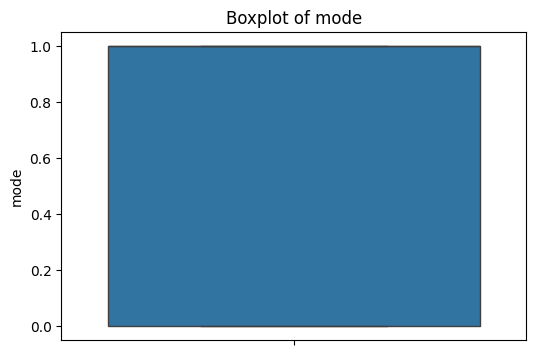

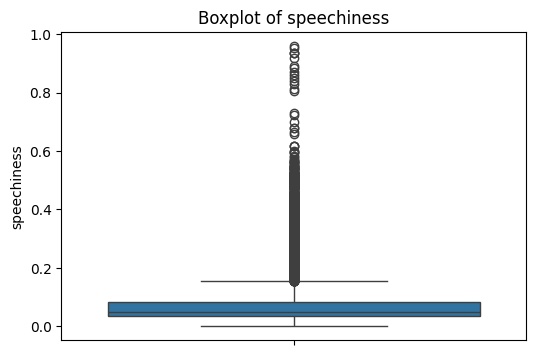

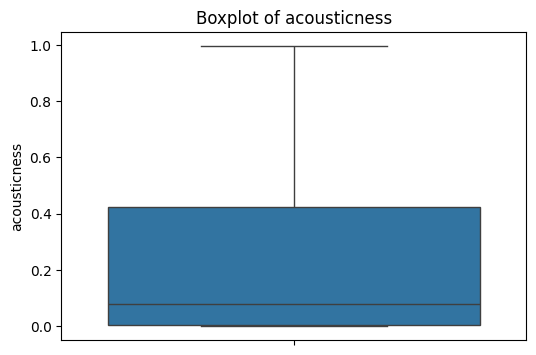

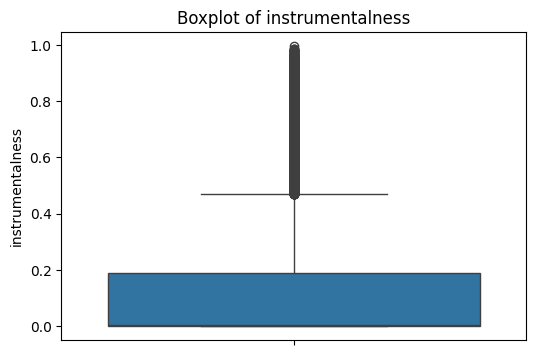

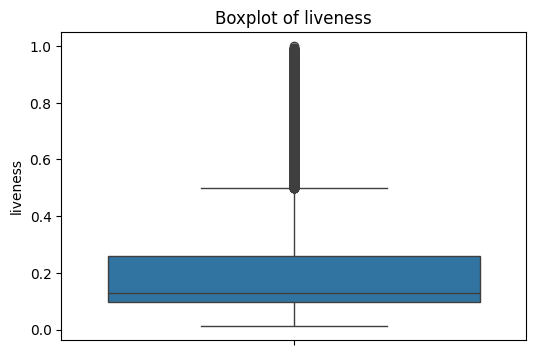

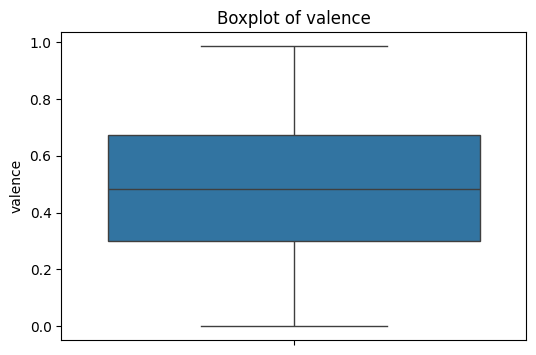

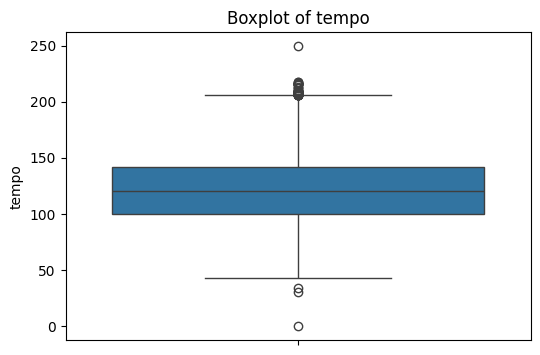

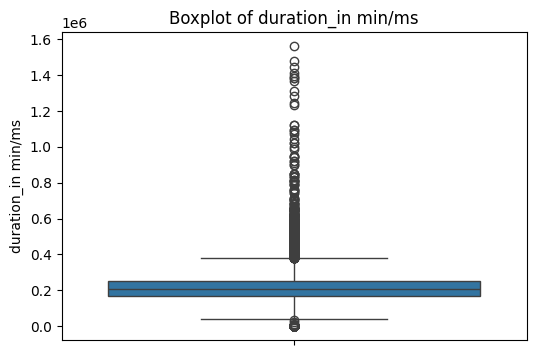

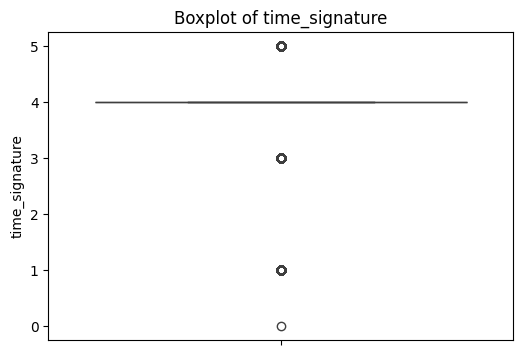

In [15]:

cols = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
        'duration_in min/ms', 'time_signature']

# Create separate boxplots for each column
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Handling Outliers using Capping

In [18]:
Q1 = data['Popularity'].quantile(0.25)
Q3 = data['Popularity'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values instead of removing them
data['Popularity'] = data['Popularity'].clip(lower=lower_bound, upper=upper_bound)

In [19]:
Q1 = data['danceability'].quantile(0.25)
Q3 = data['danceability'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values instead of removing them
data['danceability'] = data['danceability'].clip(lower=lower_bound, upper=upper_bound)

In [20]:
Q1 = data['loudness'].quantile(0.25)
Q3 = data['loudness'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values instead of removing them
data['loudness'] = data['loudness'].clip(lower=lower_bound, upper=upper_bound)

In [21]:
Q1 = data['speechiness'].quantile(0.25)
Q3 = data['speechiness'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values instead of removing them
data['speechiness'] = data['speechiness'].clip(lower=lower_bound, upper=upper_bound)

In [22]:
Q1 = data['instrumentalness'].quantile(0.25)
Q3 = data['instrumentalness'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values instead of removing them
data['instrumentalness'] = data['instrumentalness'].clip(lower=lower_bound, upper=upper_bound)

In [23]:
Q1 = data['liveness'].quantile(0.25)
Q3 = data['liveness'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values instead of removing them
data['liveness'] = data['liveness'].clip(lower=lower_bound, upper=upper_bound)

In [24]:
Q1 = data['tempo'].quantile(0.25)
Q3 = data['tempo'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values instead of removing them
data['tempo'] = data['tempo'].clip(lower=lower_bound, upper=upper_bound)

In [25]:
Q1 = data['duration_in min/ms'].quantile(0.25)
Q3 = data['duration_in min/ms'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values instead of removing them
data['duration_in min/ms'] = data['duration_in min/ms'].clip(lower=lower_bound, upper=upper_bound)

In [29]:
data['Popularity'].mean()

np.float64(44.6392192863415)

In [30]:
data['Popularity'].median()

np.float64(44.0)

In [31]:
data['Popularity'] = data['Popularity'].fillna(data['Popularity'].mean())


In [32]:
data['key'].mean()

np.float64(5.944073054572465)

In [34]:
data['key'].median()

np.float64(6.0)

In [35]:
data['key'] = data['key'].fillna(data['key'].mean())


In [36]:
data['instrumentalness'].mean()

np.float64(0.11910914171703652)

In [37]:
data['instrumentalness'].median()

np.float64(0.00395)

In [38]:
data['instrumentalness'].std()

np.float64(0.18539889169256613)

In [39]:
data['instrumentalness'] = data['instrumentalness'].fillna(data['instrumentalness'].mean())


In [40]:
data.isnull().sum()

Artist Name              0
Track Name               0
Popularity               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                 7713
dtype: int64

In [41]:
data['Class'].mean()

np.float64(6.695821293620805)

In [43]:
data['Class'].median()

np.float64(8.0)

In [44]:
data['Class'].std()

np.float64(3.2060734057470737)

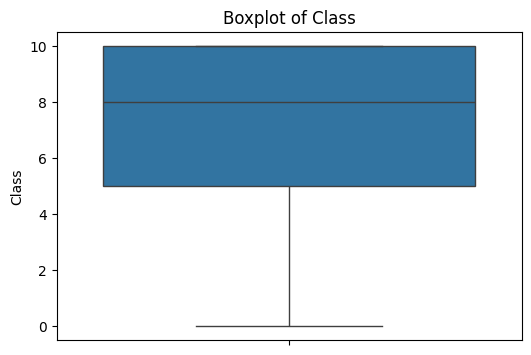

In [47]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=data['Class'])
plt.title("Boxplot of Class")
plt.show()